## 1. Setup and Data Loading

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('/workspaces/final-project-adeydebor/data/spotify_streams_2024.csv', encoding='cp1252')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Display first few rows
df.head()

Dataset shape: (4600, 29)
Columns: ['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC', 'All Time Rank', 'Track Score', 'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach', 'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity', 'Explicit Track']


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


### 1.1 Check for Duplicate Songs

In [7]:
# Check for potential duplicate songs (same track name, different releases)
print("Checking for potential duplicate songs:")
print("="*50)

# Find songs with same track name but different artists/details
duplicate_tracks = df[df.duplicated(subset=['Track'], keep=False)]
if len(duplicate_tracks) > 0:
    print(f"Found {len(duplicate_tracks)} potential duplicate track names")
    
    # Show examples of duplicates
    print("\nExamples of potential duplicates:")
    print("-" * 40)
    track_counts = duplicate_tracks['Track'].value_counts().head(10)
    for track, count in track_counts.items():
        print(f"'{track}': {count} versions")
        examples = duplicate_tracks[duplicate_tracks['Track'] == track][['Track', 'Artist', 'Spotify Streams']].head(3)
        for _, row in examples.iterrows():
            streams_clean = clean_numeric_column(pd.Series([row['Spotify Streams']])).iloc[0]
            print(f"  - {row['Artist']}: {streams_clean:,.0f} streams")
        print()
        
    # Strategy for handling duplicates
    print("Duplicate Handling Strategy:")
    print("- Remove corrupted/missing track names (Y's, empty, etc.)")
    print("- Keep songs with same name but different artists (likely different songs)")
    print("- Remove true duplicates: same track name AND same artist (keep highest streams)")
    
    # Clean Spotify Streams first for proper comparison
    df['Spotify Streams'] = clean_numeric_column(df['Spotify Streams'])
    
    # Step 1: Remove corrupted track names
    print(f"\nStep 1: Removing corrupted track names...")
    corrupted_patterns = ['Y' * 5, 'y' * 5, '', 'unknown', 'Unknown', 'UNKNOWN']
    initial_size = len(df)
    
    # Remove rows where track name is corrupted
    mask_corrupted = df['Track'].str.contains('|'.join(['^Y+
    
else:
    print("No duplicate track names found")

print(f"\nFinal dataset after duplicate check: {len(df)} songs")

SyntaxError: unterminated string literal (detected at line 37) (1609388310.py, line 37)

## 2. Initial Data Exploration

### 2.1 Data Structure and Types

In [ ]:
# Check data types and missing values
print("Data Types and Missing Values:")
print("="*50)
for col in df.columns:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    print(f"{col:30} | {str(df[col].dtype):15} | Missing: {missing_count:4d} ({missing_pct:5.1f}%)")

Data Types and Missing Values:
Track                          | object          | Missing:    0 (  0.0%)
Album Name                     | object          | Missing:    0 (  0.0%)
Artist                         | object          | Missing:    5 (  0.1%)
Release Date                   | object          | Missing:    0 (  0.0%)
ISRC                           | object          | Missing:    0 (  0.0%)
All Time Rank                  | object          | Missing:    0 (  0.0%)
Track Score                    | float64         | Missing:    0 (  0.0%)
Spotify Streams                | object          | Missing:  113 (  2.5%)
Spotify Playlist Count         | object          | Missing:   70 (  1.5%)
Spotify Playlist Reach         | object          | Missing:   72 (  1.6%)
Spotify Popularity             | float64         | Missing:  804 ( 17.5%)
YouTube Views                  | object          | Missing:  308 (  6.7%)
YouTube Likes                  | object          | Missing:  315 (  6.8%)
TikTok 

### 2.2 Sample Data Inspection

In [ ]:
# Look at a few sample rows to understand the data format
print("\nSample data for key columns:")
print("="*50)
sample_cols = ['Track', 'Artist', 'Spotify Streams', 'Spotify Playlist Count', 
               'YouTube Views', 'TikTok Posts', 'Release Date']
print(df[sample_cols].head(10))


Sample data for key columns:
                        Track          Artist Spotify Streams  \
0         MILLION DOLLAR BABY   Tommy Richman     390,470,936   
1                 Not Like Us  Kendrick Lamar     323,703,884   
2  i like the way you kiss me         Artemas     601,309,283   
3                     Flowers     Miley Cyrus   2,031,280,633   
4                     Houdini          Eminem     107,034,922   
5                 Lovin On Me     Jack Harlow     670,665,438   
6            Beautiful Things    Benson Boone     900,158,751   
7                   Gata Only      FloyyMenor     675,079,153   
8        Danza Kuduro - Cover   MUSIC LAB JPN   1,653,018,119   
9  BAND4BAND (feat. Lil Baby)     Central Cee      90,676,573   

  Spotify Playlist Count  YouTube Views TikTok Posts Release Date  
0                 30,716     84,274,754    5,767,700    4/26/2024  
1                 28,113    116,347,040      674,700     5/4/2024  
2                 54,331    122,599,116    3,025,4

## 3. Data Cleaning and Preprocessing

### 3.1 Clean Numeric Columns Stored as Strings

In [28]:
def clean_numeric_column(series):
    """
    Clean numeric columns that may contain commas, spaces, or other characters
    """
    if series.dtype == 'object':
        # Convert to string, remove commas, spaces, and handle 'nan'/'NaN' strings
        cleaned = series.astype(str).str.replace(',', '').str.replace(' ', '')
        # Replace string 'nan' with actual NaN
        cleaned = cleaned.replace(['nan', 'NaN', 'None', ''], np.nan)
        # Convert to numeric
        cleaned = pd.to_numeric(cleaned, errors='coerce')
        return cleaned
    return series

# List of columns that should be numeric (based on actual data)
numeric_columns = [
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 
    'TikTok Views', 'YouTube Playlist Reach', 'Shazam Counts',
    'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach',
    'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams'
]

# Clean numeric columns
for col in numeric_columns:
    if col in df.columns:
        original_type = df[col].dtype
        df[col] = clean_numeric_column(df[col])
        print(f"Cleaned {col}: {original_type} -> {df[col].dtype}")

Cleaned Spotify Streams: object -> float64
Cleaned Spotify Playlist Count: object -> float64
Cleaned Spotify Playlist Reach: object -> float64
Cleaned YouTube Views: object -> float64
Cleaned YouTube Likes: object -> float64
Cleaned TikTok Posts: object -> float64
Cleaned TikTok Likes: object -> float64
Cleaned TikTok Views: object -> float64
Cleaned YouTube Playlist Reach: object -> float64
Cleaned Shazam Counts: object -> float64
Cleaned AirPlay Spins: object -> float64
Cleaned SiriusXM Spins: object -> float64
Cleaned Deezer Playlist Reach: object -> float64
Cleaned Pandora Streams: object -> float64
Cleaned Pandora Track Stations: object -> float64
Cleaned Soundcloud Streams: object -> float64


### 3.2 Handle Release Date and Create Days Since Release

In [29]:
# Clean and convert Release Date
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

# Create Days Since Release (assuming data collected on Dec 31, 2024)
collection_date = datetime(2024, 12, 31)
df['Days Since Release'] = (collection_date - df['Release Date']).dt.days

print(f"Release date range: {df['Release Date'].min()} to {df['Release Date'].max()}")
print(f"Days since release range: {df['Days Since Release'].min()} to {df['Days Since Release'].max()}")

Release date range: 1987-07-21 00:00:00 to 2024-06-14 00:00:00
Days since release range: 200 to 13678


### 3.3 Create Target Variable

In [30]:
# Create binary viral variable (1 if above median streams, 0 otherwise)
median_streams = df['Spotify Streams'].median()
df['viral'] = (df['Spotify Streams'] > median_streams).astype(int)

print(f"Median Spotify Streams: {median_streams:,.0f}")
print(f"Viral songs (above median): {df['viral'].sum():,} ({df['viral'].mean()*100:.1f}%)")
print(f"Non-viral songs (below median): {(1-df['viral']).sum():,} ({(1-df['viral'].mean())*100:.1f}%)")

# Add streaming statistics
print(f"\nSpotify Streams Summary Statistics:")
print("="*45)
print(f"Minimum streams: {df['Spotify Streams'].min():,.0f}")
print(f"Maximum streams: {df['Spotify Streams'].max():,.0f}")
print(f"Mean streams: {df['Spotify Streams'].mean():,.0f}")
print(f"Standard deviation: {df['Spotify Streams'].std():,.0f}")

# Show top 5 most streamed songs
print(f"\nTop 5 Most Streamed Songs:")
print("="*40)
top_songs = df.nlargest(5, 'Spotify Streams')[['Track', 'Artist', 'Spotify Streams']]
for idx, row in top_songs.iterrows():
    print(f"{row['Track']} - {row['Artist']}: {row['Spotify Streams']:,.0f}")

# Show bottom 5 least streamed songs  
print(f"\nBottom 5 Least Streamed Songs:")
print("="*40)
bottom_songs = df.nsmallest(5, 'Spotify Streams')[['Track', 'Artist', 'Spotify Streams']]
for idx, row in bottom_songs.iterrows():
    print(f"{row['Track']} - {row['Artist']}: {row['Spotify Streams']:,.0f}")

Median Spotify Streams: 239,850,720
Viral songs (above median): 2,243 (48.8%)
Non-viral songs (below median): 2,357 (51.2%)

Spotify Streams Summary Statistics:
Minimum streams: 1,071
Maximum streams: 4,281,468,720
Mean streams: 447,387,315
Standard deviation: 538,443,905

Top 5 Most Streamed Songs:
Blinding Lights - The Weeknd: 4,281,468,720
Blinding Lights - xSyborg: 4,261,328,190
Shape of You - Ed Sheeran: 3,909,458,734
Shape of You - xSyborg: 3,888,356,417
Someone You Loved - Lewis Capaldi: 3,427,498,835

Bottom 5 Least Streamed Songs:
Poor People We - Harp and a monkey: 1,071
6. A.M. - Azul: 1,186
Numero Uno - Dan-E-MC: 1,224
No Fuss - Zeme Libre: 1,332
Very Cute Melody by Marimba Tone (39813) - mitsu sound: 1,384


### 3.4 Drop Unnecessary Columns and Handle Missing Values

In [31]:
# Drop columns as specified in project requirements + focus on major platforms
columns_to_drop = [
    'ISRC', 'Album Name', 'TIDAL Popularity',  # Project requirements + 100% missing
    # Focus on major platforms: Spotify, YouTube, TikTok, Apple Music, Shazam
    # Exclude smaller/niche platforms
    'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Count', 'Deezer Playlist Reach',
    'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations', 'Soundcloud Streams'
]

# Check which columns actually exist before dropping
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]
print(f"\nExcluding columns to focus on major platforms:")
for col in existing_columns_to_drop:
    if col in df.columns:
        missing_pct = (df[col].isnull().sum() / len(df)) * 100
        reason = "100% missing" if col == 'TIDAL Popularity' else "Project requirement" if col in ['ISRC', 'Album Name'] else "Focus on major platforms"
        print(f"  - {col}: {reason}")

# Drop the columns
df = df.drop(columns=existing_columns_to_drop)

# Keep Track and Artist for labeling but don't use in modeling
identifier_columns = ['Track', 'Artist']

# Display final column list and missing value summary
print(f"\nFinal dataset columns ({len(df.columns)} total) - Major Platforms Focus:")
print("="*75)
print(f"{'Column Name':<30} {'Missing Count':<12} {'Missing %':<10} {'Platform'}")
print("-" * 75)

# Categorize columns by platform for clarity
platform_map = {
    'Spotify': ['Spotify Popularity', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'Spotify Streams'],
    'YouTube': ['YouTube Views', 'YouTube Likes', 'YouTube Playlist Reach'],
    'TikTok': ['TikTok Posts', 'TikTok Likes', 'TikTok Views'],
    'Apple Music': ['Apple Music Playlist Count'],
    'General': ['Shazam Counts', 'Soundcloud Streams', 'Explicit Track', 'Days Since Release', 'All Time Rank', 'Track Score'],
    'Identifiers': ['Track', 'Artist', 'Release Date']
}

for platform, cols in platform_map.items():
    for col in cols:
        if col in df.columns and col not in identifier_columns:
            missing_count = df[col].isnull().sum()
            missing_pct = (missing_count / len(df)) * 100
            print(f"{col:<30} {missing_count:<12} {missing_pct:<10.1f} {platform}")

print(f"\nFinal dataset shape: {df.shape}")
print("✓ Focused on major music platforms: Spotify, YouTube, TikTok, Apple Music, Shazam")

# Check missing values after cleaning
print("\nMissing values summary after platform focus:")
print("="*50)
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0].sort_values(ascending=False)

# Display with percentages
for col, count in missing_summary.items():
    missing_pct = (count / len(df)) * 100
    print(f"{col:30}: {count:4d} ({missing_pct:5.1f}%)")


Excluding columns to focus on major platforms:
  - ISRC: Project requirement
  - Album Name: Project requirement
  - TIDAL Popularity: 100% missing
  - AirPlay Spins: Focus on major platforms
  - SiriusXM Spins: Focus on major platforms
  - Deezer Playlist Count: Focus on major platforms
  - Deezer Playlist Reach: Focus on major platforms
  - Amazon Playlist Count: Focus on major platforms
  - Pandora Streams: Focus on major platforms
  - Pandora Track Stations: Focus on major platforms
  - Soundcloud Streams: Focus on major platforms

Final dataset columns (20 total) - Major Platforms Focus:
Column Name                    Missing Count Missing %  Platform
---------------------------------------------------------------------------
Spotify Popularity             804          17.5       Spotify
Spotify Playlist Count         70           1.5        Spotify
Spotify Playlist Reach         72           1.6        Spotify
Spotify Streams                113          2.5        Spotify
YouTub

## 4. Exploratory Data Analysis

### 4.1 Target Variable Distribution

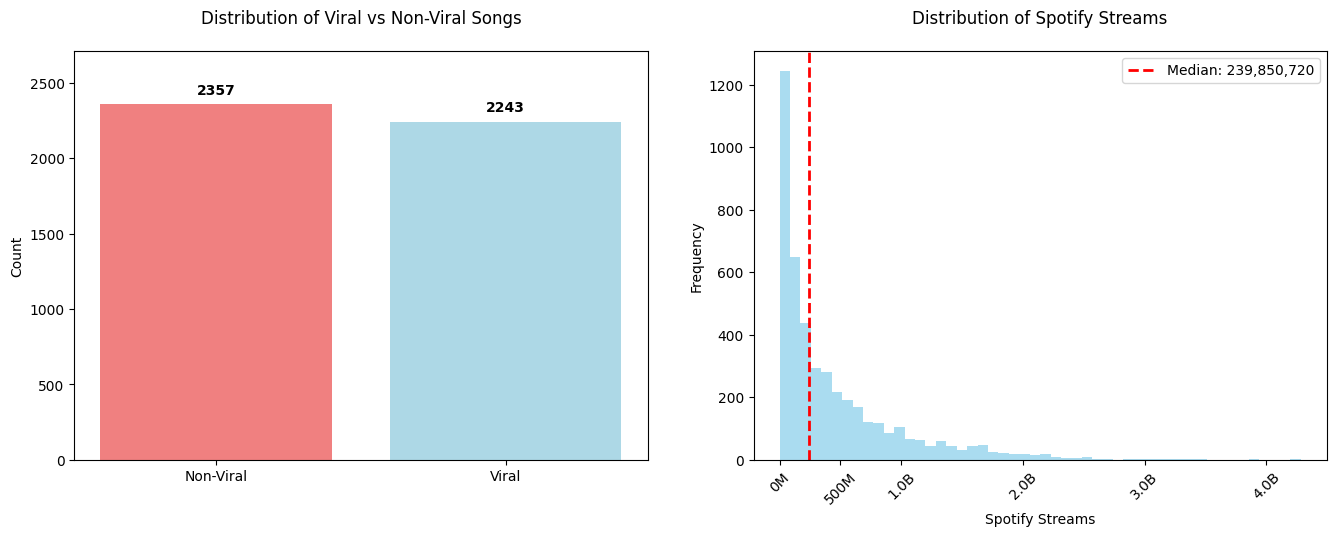

In [32]:
plt.figure(figsize=(14, 6))

# Subplot 1: Viral vs Non-viral counts
plt.subplot(1, 2, 1)
viral_counts = df['viral'].value_counts()
bars = plt.bar(['Non-Viral', 'Viral'], viral_counts.values, color=['lightcoral', 'lightblue'])
plt.title('Distribution of Viral vs Non-Viral Songs', pad=20)
plt.ylabel('Count')
# Add value labels on bars
for i, v in enumerate(viral_counts.values):
    plt.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')
# Add some padding to y-axis
plt.ylim(0, max(viral_counts.values) * 1.15)

# Subplot 2: Spotify Streams distribution with median line
plt.subplot(1, 2, 2)
plt.hist(df['Spotify Streams'].dropna(), bins=50, alpha=0.7, color='skyblue')
plt.axvline(median_streams, color='red', linestyle='--', linewidth=2, label=f'Median: {median_streams:,.0f}')
plt.xlabel('Spotify Streams')
plt.ylabel('Frequency')
plt.title('Distribution of Spotify Streams', pad=20)
plt.legend()

# Smart formatter: show millions (M) for < 1B, billions (B) for >= 1B
def smart_format(x, p):
    if x >= 1e9:
        return f'{x/1e9:.1f}B'
    else:
        return f'{x/1e6:.0f}M'

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(smart_format))

# Set fewer, well-spaced x-axis tick points for better readability
max_streams = df['Spotify Streams'].max()
tick_positions = [0, 500e6, 1e9, 2e9, 3e9, 4e9]
# Only use ticks that are within our data range
tick_positions = [tick for tick in tick_positions if tick <= max_streams * 1.1]
ax.set_xticks(tick_positions)

# Rotate labels to prevent overlap
plt.xticks(rotation=45)

plt.tight_layout(pad=3.0)
plt.show()

### 4.2 Feature Distributions by Viral Status

Features selected for analysis: ['Spotify Popularity', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views', 'Apple Music Playlist Count', 'Shazam Counts', 'Days Since Release', 'YouTube Playlist Reach']


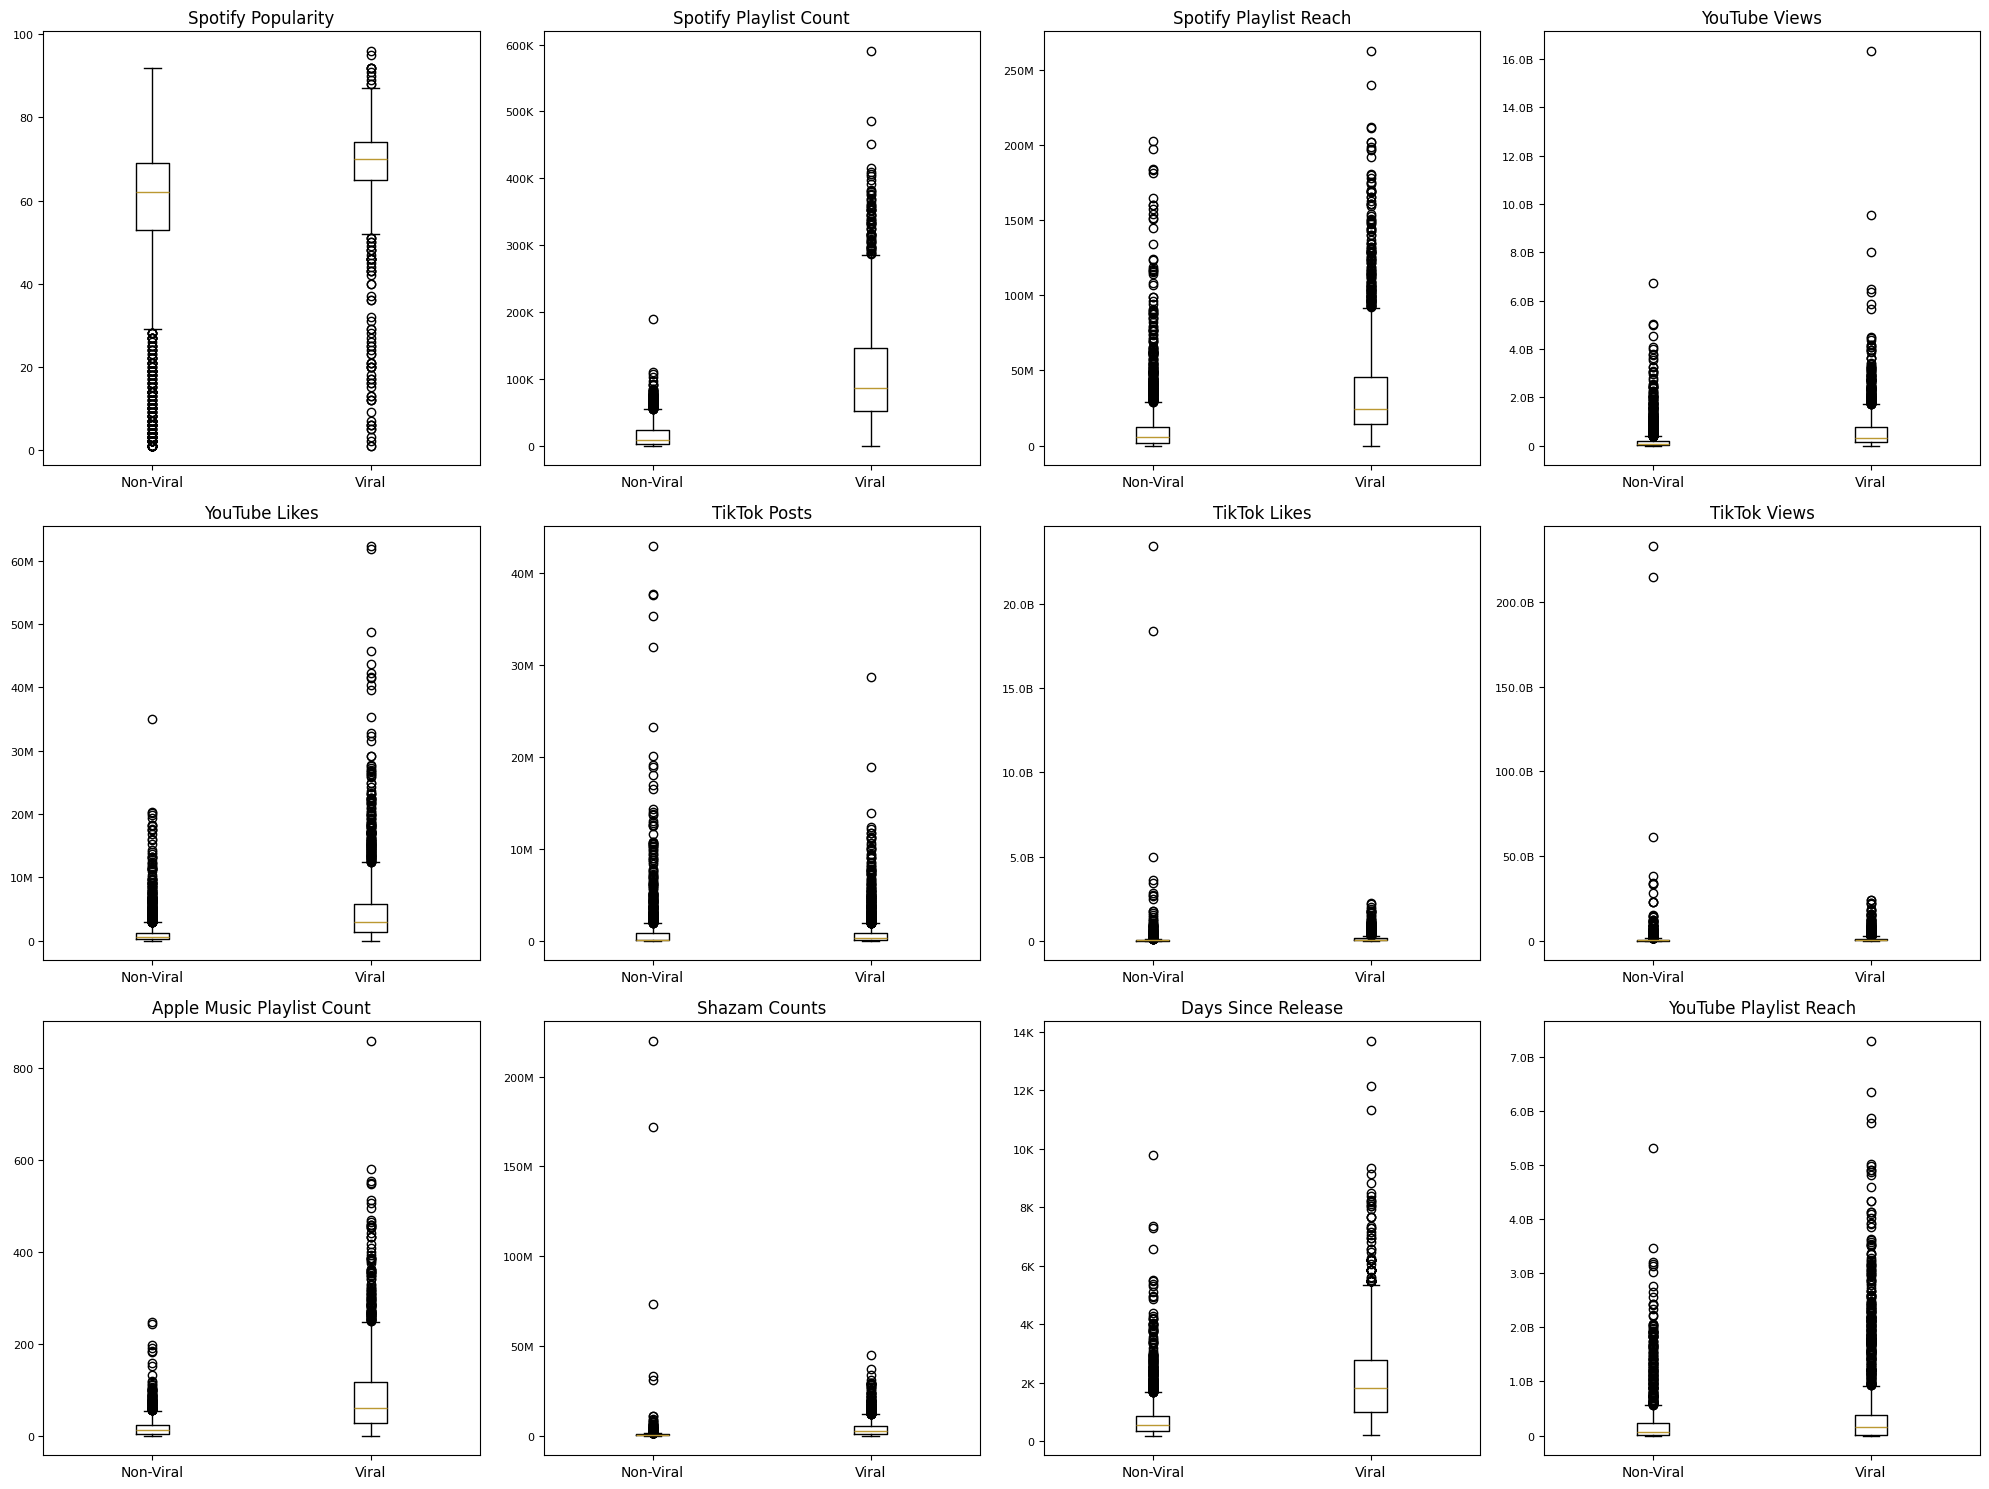

In [33]:
# Select key features for analysis (focusing on features with reasonable data availability)
# Note: Spotify Streams excluded as it was used to create the target variable
feature_columns = [
    'Spotify Popularity', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'Apple Music Playlist Count', 'Shazam Counts', 'Days Since Release',
    'YouTube Playlist Reach', 'Deezer Playlist Count', 'Amazon Playlist Count'
]

# Only include features that actually exist in the dataset
feature_columns = [col for col in feature_columns if col in df.columns]
print(f"Features selected for analysis: {feature_columns}")

# Create comparison plots for features with <30% missing values
valid_features = []
for col in feature_columns:
    missing_pct = (df[col].isnull().sum() / len(df)) * 100
    if missing_pct < 30:  # Only use features with <30% missing
        valid_features.append(col)
    else:
        print(f"Skipping {col} due to {missing_pct:.1f}% missing values")

feature_columns = valid_features

# Create comparison plots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.flatten()

# Helper function to format large numbers
def format_axis_labels(ax, values):
    """Format axis labels to show K, M, B instead of scientific notation"""
    def smart_format_axis(x, p):
        if abs(x) >= 1e9:
            return f'{x/1e9:.1f}B'
        elif abs(x) >= 1e6:
            return f'{x/1e6:.0f}M'
        elif abs(x) >= 1e3:
            return f'{x/1e3:.0f}K'
        else:
            return f'{x:.0f}'
    
    ax.yaxis.set_major_formatter(plt.FuncFormatter(smart_format_axis))

for i, col in enumerate(feature_columns):
    if col in df.columns and i < len(axes):
        # Create box plots comparing viral vs non-viral
        viral_data = df[df['viral'] == 1][col].dropna()
        non_viral_data = df[df['viral'] == 0][col].dropna()
        
        box_plot = axes[i].boxplot([non_viral_data, viral_data], labels=['Non-Viral', 'Viral'])
        axes[i].set_title(f'{col}')
        axes[i].tick_params(axis='y', labelsize=8)
        
        # Format y-axis labels to be readable
        format_axis_labels(axes[i], pd.concat([viral_data, non_viral_data]))

# Remove extra subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 4.3 Correlation Analysis

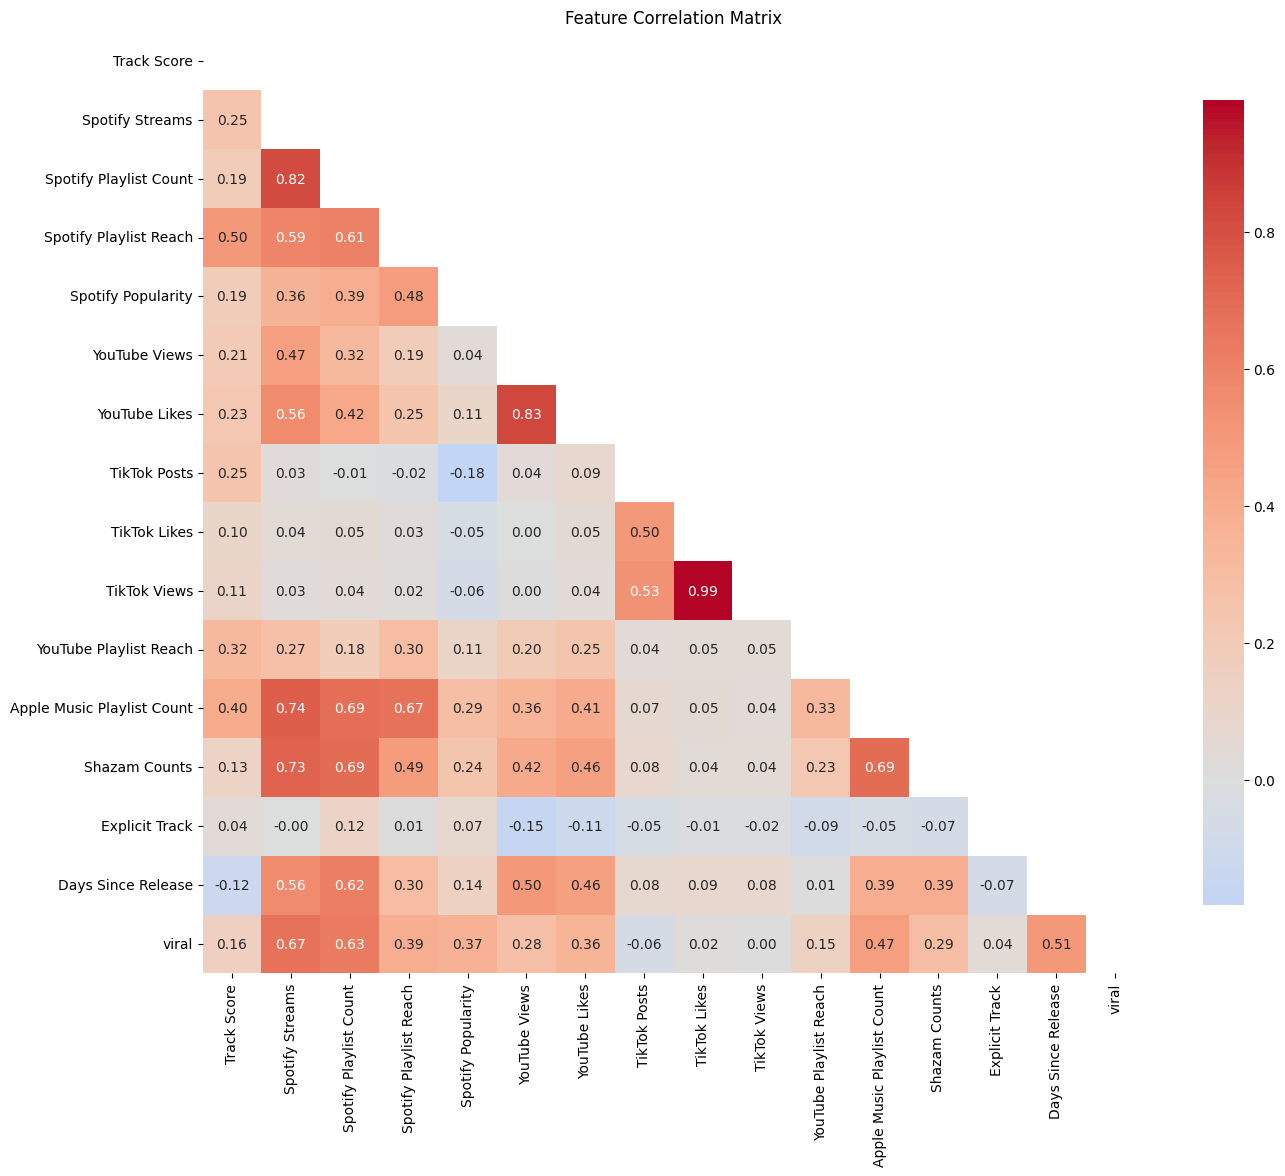

Correlations with Viral status:
Spotify Streams               :  0.672
Spotify Playlist Count        :  0.629
Days Since Release            :  0.506
Apple Music Playlist Count    :  0.468
Spotify Playlist Reach        :  0.395
Spotify Popularity            :  0.369
YouTube Likes                 :  0.359
Shazam Counts                 :  0.287
YouTube Views                 :  0.276
Track Score                   :  0.160
YouTube Playlist Reach        :  0.145
TikTok Posts                  : -0.056
Explicit Track                :  0.043
TikTok Likes                  :  0.017
TikTok Views                  :  0.003


In [34]:
# Select numeric columns for correlation analysis
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove target variable and identifier columns
numeric_features = [col for col in numeric_features if col not in ['viral'] + identifier_columns]

# Calculate correlation matrix
correlation_matrix = df[numeric_features + ['viral']].corr()

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Show correlations with target variable
target_correlations = correlation_matrix['viral'].drop('viral').sort_values(key=abs, ascending=False)
print("Correlations with Viral status:")
print("="*35)
for feature, corr in target_correlations.items():
    print(f"{feature:30}: {corr:6.3f}")

### 4.4 Address Multicollinearity

In [35]:
# Create working copy of feature list for cleaning
feature_columns_clean = feature_columns.copy()

# Check for problematic multicollinearity (correlation > 0.8)
print("\nMulticollinearity Check (correlation > 0.8):")
print("="*45)

# Remove highly correlated feature pairs based on correlation matrix analysis
# Note: Ignoring correlations with Spotify Streams since it won't be used in modeling
correlations_to_check = [
    ('TikTok Views', 'TikTok Likes', 0.99, 'TikTok Views'),  # Remove Views (keep Likes - better for engagement analysis)
    ('YouTube Views', 'YouTube Likes', 0.83, 'YouTube Likes')  # Remove Likes (keep Views - broader reach metric)
]

for feat1, feat2, corr, remove_feature in correlations_to_check:
    if feat1 in feature_columns_clean and feat2 in feature_columns_clean:
        feature_columns_clean.remove(remove_feature)
        keep_feature = feat1 if remove_feature == feat2 else feat2
        print(f"Removed '{remove_feature}' due to high correlation with '{keep_feature}' (r={corr:.2f})")
    elif feat1 not in feature_columns_clean or feat2 not in feature_columns_clean:
        missing_feat = feat1 if feat1 not in feature_columns_clean else feat2
        print(f"'{missing_feat}' already excluded from feature set")

print("Other feature correlations are within acceptable range for modeling")
print("Note: Spotify Streams correlations ignored since it won't be used as a predictor")

print(f"\nFinal features for modeling ({len(feature_columns_clean)} total):")
for i, feat in enumerate(feature_columns_clean, 1):
    print(f"  {i:2d}. {feat}")


Multicollinearity Check (correlation > 0.8):
Removed 'TikTok Views' due to high correlation with 'TikTok Likes' (r=0.99)
Removed 'YouTube Likes' due to high correlation with 'YouTube Views' (r=0.83)
Other feature correlations are within acceptable range for modeling
Note: Spotify Streams correlations ignored since it won't be used as a predictor

Final features for modeling (10 total):
   1. Spotify Popularity
   2. Spotify Playlist Count
   3. Spotify Playlist Reach
   4. YouTube Views
   5. TikTok Posts
   6. TikTok Likes
   7. Apple Music Playlist Count
   8. Shazam Counts
   9. Days Since Release
  10. YouTube Playlist Reach


### 4.5 Summary Statistics Table

In [36]:
# Create Table 1: Descriptive Statistics for Final Features
print("\n" + "="*80)
print("TABLE 1: DESCRIPTIVE STATISTICS FOR MODELING FEATURES")
print("="*80)

# Calculate statistics for clean features only
final_stats = []
for feature in feature_columns_clean:
    if feature in df.columns:
        stats = {
            'Feature': feature,
            'Count': df[feature].notna().sum(),
            'Missing (%)': (df[feature].isnull().sum() / len(df)) * 100,
            'Mean': df[feature].mean() if df[feature].dtype in ['float64', 'int64'] else 'N/A',
            'Std': df[feature].std() if df[feature].dtype in ['float64', 'int64'] else 'N/A',
            'Min': df[feature].min() if df[feature].dtype in ['float64', 'int64'] else 'N/A',
            'Max': df[feature].max() if df[feature].dtype in ['float64', 'int64'] else 'N/A'
        }
        final_stats.append(stats)

# Create and display the table
import pandas as pd
stats_df = pd.DataFrame(final_stats)

print(f"{'Feature':<30} {'Count':<6} {'Missing%':<8} {'Mean':<12} {'Std':<12} {'Min':<12} {'Max':<12}")
print("-" * 100)

for _, row in stats_df.iterrows():
    feature_name = row['Feature'][:29]  # Truncate if too long
    count = f"{row['Count']}"
    missing = f"{row['Missing (%)']:.1f}%"
    
    if row['Mean'] != 'N/A':
        mean = f"{row['Mean']:,.0f}" if row['Mean'] >= 1 else f"{row['Mean']:.3f}"
        std = f"{row['Std']:,.0f}" if row['Std'] >= 1 else f"{row['Std']:.3f}"
        min_val = f"{row['Min']:,.0f}" if row['Min'] >= 1 else f"{row['Min']:.3f}"
        max_val = f"{row['Max']:,.0f}" if row['Max'] >= 1 else f"{row['Max']:.3f}"
    else:
        mean = std = min_val = max_val = "N/A"
    
    print(f"{feature_name:<30} {count:<6} {missing:<8} {mean:<12} {std:<12} {min_val:<12} {max_val:<12}")

print("\nNote: Statistics shown after data cleaning and before imputation")
print("Features selected based on platform importance and multicollinearity analysis")


TABLE 1: DESCRIPTIVE STATISTICS FOR MODELING FEATURES
Feature                        Count  Missing% Mean         Std          Min          Max         
----------------------------------------------------------------------------------------------------
Spotify Popularity             3796   17.5%    64           16           1            96          
Spotify Playlist Count         4530   1.5%     59,391       71,131       1            590,392     
Spotify Playlist Reach         4528   1.6%     23,346,816   29,687,169   1            262,343,414 
YouTube Views                  4292   6.7%     402,796,729  701,900,001  913          16,322,756,555
TikTok Posts                   3427   25.5%    944,308      2,442,080    1            42,900,000  
TikTok Likes                   3620   21.3%    112,637,465  549,812,332  3            23,474,223,833
Apple Music Playlist Count     4039   12.2%    55           72           1            859         
Shazam Counts                  4023   12.5%    2

## 5. Feature Engineering and Preparation

### 5.1 Handle Missing Values Strategy
Use median imputation; median is robust to outliers and preserves distribution center

In [37]:
# Analyze missing value patterns and create imputation tracking
print("Missing Value Analysis and Imputation Strategy:")
print("="*60)
missing_analysis = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': [df[col].isnull().sum() for col in df.columns],
    'Missing_Percentage': [(df[col].isnull().sum() / len(df)) * 100 for col in df.columns]
}).sort_values('Missing_Percentage', ascending=False)

# Show only columns with missing values
missing_data = missing_analysis[missing_analysis['Missing_Percentage'] > 0]
print(missing_data.to_string(index=False))

# Strategy for handling missing values:
print(f"\nImputation Strategy:")
print("• 0% missing: No action needed")
print("• 1-10% missing: Median imputation (minimal impact)")
print("• 10-20% missing: Median imputation (document in results)")
print("• 20-30% missing: Median imputation (interpret cautiously - major platforms only)")

# Track which features will be imputed for reporting
imputation_log = {}

# Fill missing values with median for numeric columns (conservative approach)
for col in feature_columns_clean:
    if col in df.columns and df[col].isnull().sum() > 0:
        original_missing = df[col].isnull().sum()
        missing_pct = (original_missing / len(df)) * 100
        
        if df[col].dtype in ['float64', 'int64']:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            imputation_log[col] = {'count': original_missing, 'percentage': missing_pct, 'method': 'median', 'value': median_val}
            print(f"Imputed {col}: {original_missing} values ({missing_pct:.1f}%) with median: {median_val}")
        else:
            mode_val = df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 0
            df[col].fillna(mode_val, inplace=True)
            imputation_log[col] = {'count': original_missing, 'percentage': missing_pct, 'method': 'mode', 'value': mode_val}
            print(f"Imputed {col}: {original_missing} values ({missing_pct:.1f}%) with mode: {mode_val}")

# Add explicit track to features if not already included
if 'Explicit Track' not in feature_columns_clean and 'Explicit Track' in df.columns:
    feature_columns_clean.append('Explicit Track')
    
# Store imputation log for later reference in results
print(f"\nImputation Summary: {len(imputation_log)} features required imputation")
for col, info in imputation_log.items():
    if info['percentage'] > 20:
        print(f"Note: {col}: {info['percentage']:.1f}% imputed - interpret results cautiously")

Missing Value Analysis and Imputation Strategy:
                    Column  Missing_Count  Missing_Percentage
              TikTok Posts           1173           25.500000
    YouTube Playlist Reach           1009           21.934783
              TikTok Views            981           21.326087
              TikTok Likes            980           21.304348
        Spotify Popularity            804           17.478261
             Shazam Counts            577           12.543478
Apple Music Playlist Count            561           12.195652
             YouTube Likes            315            6.847826
             YouTube Views            308            6.695652
           Spotify Streams            113            2.456522
    Spotify Playlist Reach             72            1.565217
    Spotify Playlist Count             70            1.521739
                    Artist              5            0.108696

Imputation Strategy:
• 0% missing: No action needed
• 1-10% missing: Median imputat

### 5.2 Feature Scaling and Selection

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Prepare features for modeling
X_columns = feature_columns_clean.copy()
# Ensure we include Explicit Track if it exists and isn't already included
if 'Explicit Track' in df.columns and 'Explicit Track' not in X_columns:
    X_columns.append('Explicit Track')

print(f"Final features for modeling: {X_columns}")

# Create feature matrix, handling any remaining issues
X = df[X_columns].copy()
y = df['viral'].copy()

# Remove any remaining rows with missing target values or key features
mask = ~y.isnull()
# Also remove rows where key Spotify metrics are missing (these are essential)
essential_features = ['Spotify Streams', 'Spotify Popularity']
for feat in essential_features:
    if feat in df.columns:
        mask = mask & ~df[feat].isnull()

X, y = X[mask], y[mask]

print(f"Final dataset shape: X={X.shape}, y={y.shape}")
print(f"Removed {len(df) - len(X)} rows due to missing essential data")
print(f"Features used: {X.columns.tolist()}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")
print(f"Training set viral rate: {y_train.mean():.3f}")
print(f"Test set viral rate: {y_test.mean():.3f}")

Final features for modeling: ['Spotify Popularity', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 'Shazam Counts', 'Days Since Release', 'YouTube Playlist Reach', 'Explicit Track']
Final dataset shape: X=(4487, 11), y=(4487,)
Removed 113 rows due to missing essential data
Features used: ['Spotify Popularity', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'TikTok Posts', 'TikTok Likes', 'Apple Music Playlist Count', 'Shazam Counts', 'Days Since Release', 'YouTube Playlist Reach', 'Explicit Track']
Training set: (3589, 11), Test set: (898, 11)
Training set viral rate: 0.500
Test set viral rate: 0.500


## 6. Model Building and Evaluation
**Modeling Approach**: Using engagement metrics accumulated between song release and December 31, 2024, we build predictive models to identify songs that achieved viral streaming status (>240M streams). The models learn patterns of how accumulated engagement across platforms, combined with time since release, predicts viral success.
### 6.1 Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)
lr_train_prob = lr_model.predict_proba(X_train_scaled)[:, 1]
lr_test_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Logistic Regression
print("LOGISTIC REGRESSION RESULTS")
print("="*50)
print(f"Training Accuracy: {lr_model.score(X_train_scaled, y_train):.3f}")
print(f"Test Accuracy: {lr_model.score(X_test_scaled, y_test):.3f}")
print(f"Training AUC: {roc_auc_score(y_train, lr_train_prob):.3f}")
print(f"Test AUC: {roc_auc_score(y_test, lr_test_prob):.3f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, lr_test_pred))

LOGISTIC REGRESSION RESULTS
Training Accuracy: 0.881
Test Accuracy: 0.876
Training AUC: 0.943
Test AUC: 0.951

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       449
           1       0.91      0.83      0.87       449

    accuracy                           0.88       898
   macro avg       0.88      0.88      0.88       898
weighted avg       0.88      0.88      0.88       898



### 6.2 Random Forest

In [40]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # No need to scale for Random Forest

# Predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_train_prob = rf_model.predict_proba(X_train)[:, 1]
rf_test_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
print("\nRANDOM FOREST RESULTS")
print("="*50)
print(f"Training Accuracy: {rf_model.score(X_train, y_train):.3f}")
print(f"Test Accuracy: {rf_model.score(X_test, y_test):.3f}")
print(f"Training AUC: {roc_auc_score(y_train, rf_train_prob):.3f}")
print(f"Test AUC: {roc_auc_score(y_test, rf_test_prob):.3f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, rf_test_pred))


RANDOM FOREST RESULTS
Training Accuracy: 1.000
Test Accuracy: 0.939
Training AUC: 1.000
Test AUC: 0.988

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       449
           1       0.96      0.92      0.94       449

    accuracy                           0.94       898
   macro avg       0.94      0.94      0.94       898
weighted avg       0.94      0.94      0.94       898



### 6.3 Cross-Validation

In [41]:
# Perform cross-validation
cv_scores_lr = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='roc_auc')
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')

print("\nCROSS-VALIDATION RESULTS (AUC)")
print("="*40)
print(f"Logistic Regression: {cv_scores_lr.mean():.3f} (+/- {cv_scores_lr.std() * 2:.3f})")
print(f"Random Forest: {cv_scores_rf.mean():.3f} (+/- {cv_scores_rf.std() * 2:.3f})")


CROSS-VALIDATION RESULTS (AUC)
Logistic Regression: 0.942 (+/- 0.022)
Random Forest: 0.980 (+/- 0.013)


## 7. Model Interpretation and Feature Importance

### 7.1 Logistic Regression Coefficients

LOGISTIC REGRESSION COEFFICIENTS AND ODDS RATIOS
Feature                        Coefficient  Odds Ratio   Interpretation
--------------------------------------------------------------------------------
Spotify Playlist Count         3.0826       21.8159      Strong +
Apple Music Playlist Count     1.4243       4.1551       Strong +
Shazam Counts                  0.9074       2.4779       Strong +
Days Since Release             0.7756       2.1720       Strong +
Spotify Popularity             0.6723       1.9587       Moderate +
YouTube Views                  0.3008       1.3509       Moderate +
Spotify Playlist Reach         -0.2639      0.7681       Moderate -
Explicit Track                 -0.1897      0.8272       Moderate -
YouTube Playlist Reach         0.1800       1.1972       Moderate +
TikTok Posts                   -0.1279      0.8800       Moderate -
TikTok Likes                   0.0050       1.0050       Moderate +

Odds Ratio Interpretation:
• > 2.0: Strong positive effec

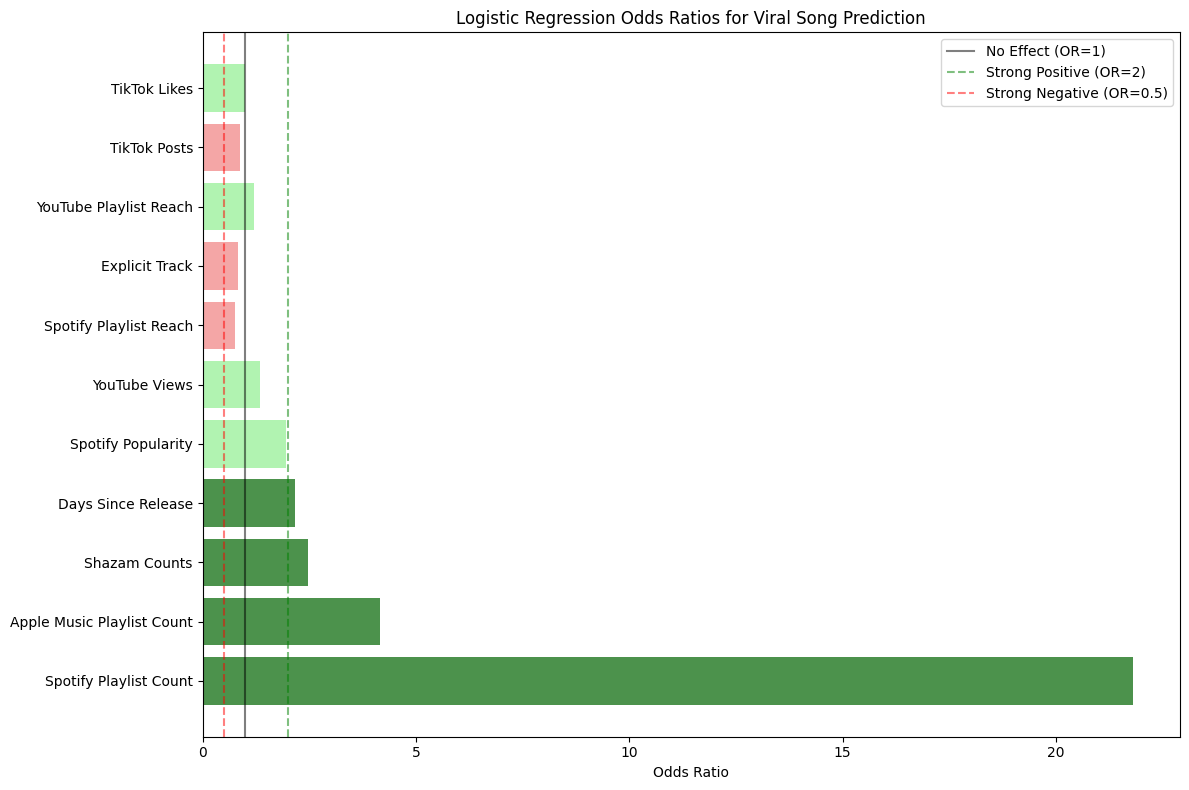

In [42]:
# Get feature coefficients and convert to odds ratios
feature_names = X.columns
lr_coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lr_model.coef_[0],
    'Odds_Ratio': np.exp(lr_model.coef_[0]),
    'Abs_Coefficient': np.abs(lr_model.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("LOGISTIC REGRESSION COEFFICIENTS AND ODDS RATIOS")
print("="*60)
print(f"{'Feature':<30} {'Coefficient':<12} {'Odds Ratio':<12} {'Interpretation'}")
print("-" * 80)

for _, row in lr_coefficients.iterrows():
    feature = row['Feature'][:29]
    coef = f"{row['Coefficient']:.4f}"
    odds_ratio = f"{row['Odds_Ratio']:.4f}"
    
    # Interpretation of odds ratio
    if row['Odds_Ratio'] > 1:
        if row['Odds_Ratio'] > 2:
            interpretation = f"Strong +"
        else:
            interpretation = f"Moderate +"
    elif row['Odds_Ratio'] < 1:
        if row['Odds_Ratio'] < 0.5:
            interpretation = f"Strong -"
        else:
            interpretation = f"Moderate -"
    else:
        interpretation = "Neutral"
    
    print(f"{feature:<30} {coef:<12} {odds_ratio:<12} {interpretation}")

print(f"\nOdds Ratio Interpretation:")
print("• > 2.0: Strong positive effect (doubles+ odds of virality)")
print("• 1.0-2.0: Moderate positive effect")  
print("• 0.5-1.0: Moderate negative effect")
print("• < 0.5: Strong negative effect (halves+ odds of virality)")
print("• = 1.0: No effect on viral probability")

# Plot odds ratios
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(lr_coefficients))

# Color code based on effect direction and strength
colors = []
for odds_ratio in lr_coefficients['Odds_Ratio']:
    if odds_ratio > 2:
        colors.append('darkgreen')
    elif odds_ratio > 1:
        colors.append('lightgreen')
    elif odds_ratio > 0.5:
        colors.append('lightcoral')
    else:
        colors.append('darkred')

plt.barh(y_pos, lr_coefficients['Odds_Ratio'], color=colors, alpha=0.7)
plt.yticks(y_pos, lr_coefficients['Feature'])
plt.xlabel('Odds Ratio')
plt.title('Logistic Regression Odds Ratios for Viral Song Prediction')
plt.axvline(x=1, color='black', linestyle='-', alpha=0.5, label='No Effect (OR=1)')
plt.axvline(x=2, color='green', linestyle='--', alpha=0.5, label='Strong Positive (OR=2)')
plt.axvline(x=0.5, color='red', linestyle='--', alpha=0.5, label='Strong Negative (OR=0.5)')
plt.legend()
plt.tight_layout()
plt.show()

### 7.2 Random Forest Feature Importance


RANDOM FOREST FEATURE IMPORTANCE
                       Feature  Importance
1       Spotify Playlist Count    0.252326
7                Shazam Counts    0.168760
2       Spotify Playlist Reach    0.140458
8           Days Since Release    0.123253
3                YouTube Views    0.093349
6   Apple Music Playlist Count    0.067989
0           Spotify Popularity    0.063142
5                 TikTok Likes    0.034427
4                 TikTok Posts    0.027846
9       YouTube Playlist Reach    0.022173
10              Explicit Track    0.006278


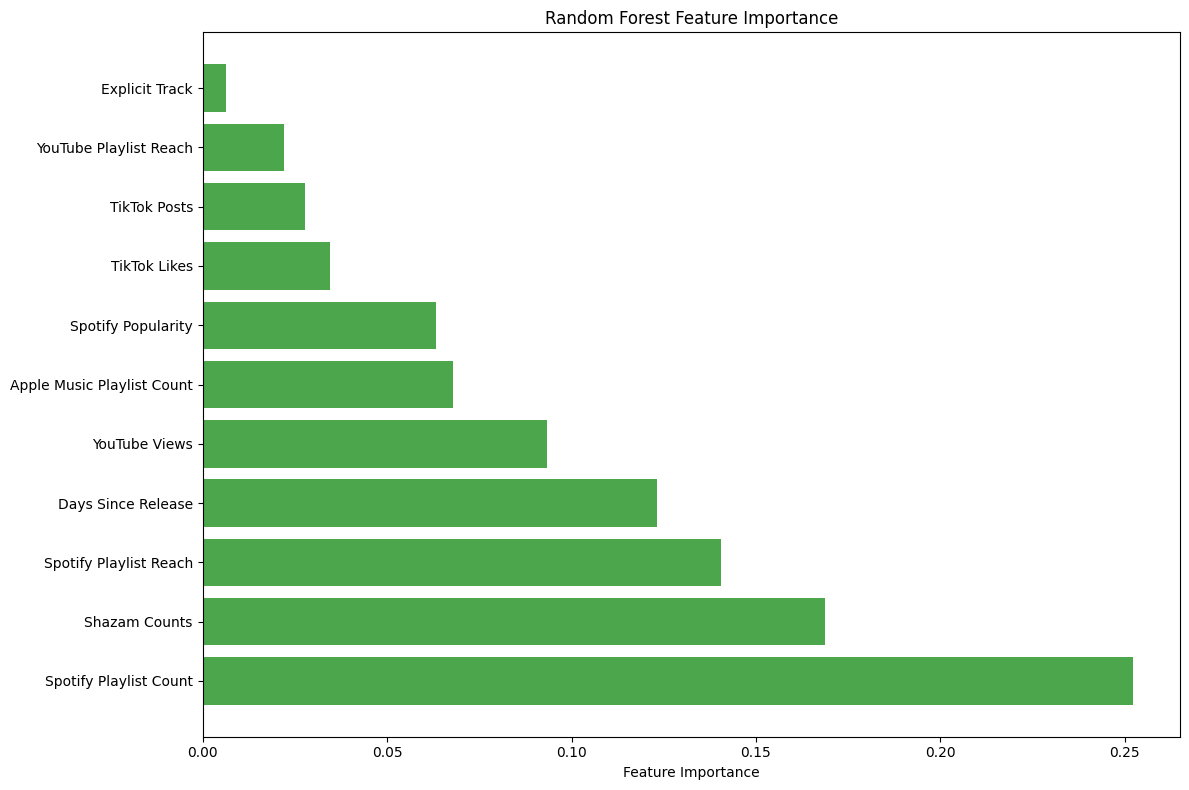

In [43]:
# Get feature importance
rf_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nRANDOM FOREST FEATURE IMPORTANCE")
print("="*40)
print(rf_importance)

# Plot feature importance
plt.figure(figsize=(12, 8))
y_pos = np.arange(len(rf_importance))
plt.barh(y_pos, rf_importance['Importance'], color='green', alpha=0.7)
plt.yticks(y_pos, rf_importance['Feature'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

### 7.3 ROC Curves Comparison

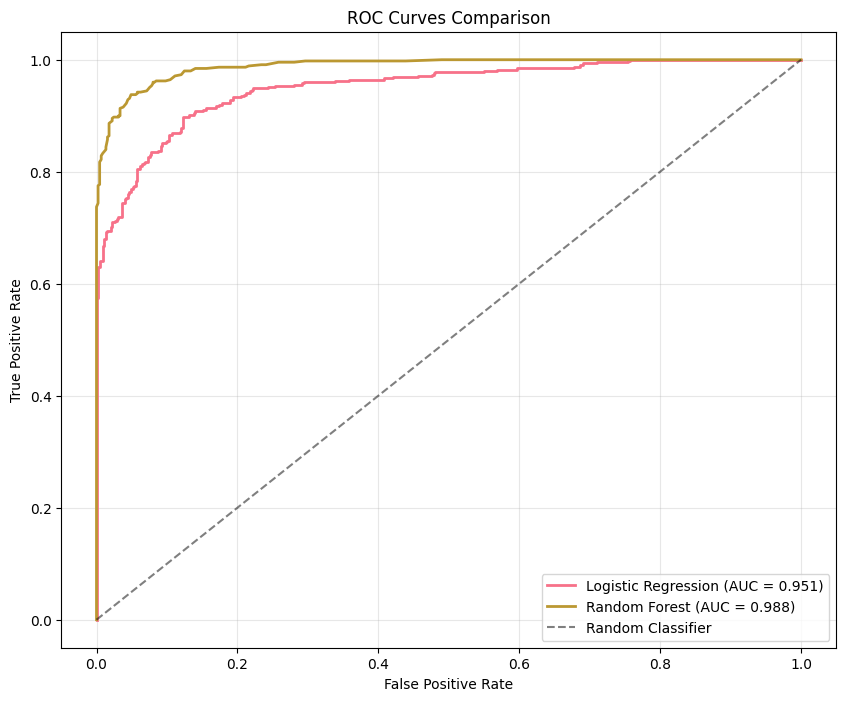

In [44]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_test_prob)
auc_lr = roc_auc_score(y_test, lr_test_prob)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.3f})', linewidth=2)

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_test_prob)
auc_rf = roc_auc_score(y_test, rf_test_prob)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)

# Random classifier line
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 8. Results Analysis and Insights

**Model Performance Summary**: Our predictive models successfully identify viral songs based on accumulated engagement patterns and time since release. Both models demonstrate strong performance in distinguishing songs that achieved mega-hit status (>240M streams) from those that remained highly successful but non-viral.

### 8.1 Model Performance Summary

In [45]:
print("MODEL PERFORMANCE SUMMARY")
print("="*50)
print(f"{'Metric':<20} {'Logistic Reg':<15} {'Random Forest':<15}")
print("-" * 50)
print(f"{'Test Accuracy':<20} {lr_model.score(X_test_scaled, y_test):<15.3f} {rf_model.score(X_test, y_test):<15.3f}")
print(f"{'Test AUC':<20} {roc_auc_score(y_test, lr_test_prob):<15.3f} {roc_auc_score(y_test, rf_test_prob):<15.3f}")
print(f"{'CV AUC (mean)':<20} {cv_scores_lr.mean():<15.3f} {cv_scores_rf.mean():<15.3f}")

MODEL PERFORMANCE SUMMARY
Metric               Logistic Reg    Random Forest  
--------------------------------------------------
Test Accuracy        0.876           0.939          
Test AUC             0.951           0.988          
CV AUC (mean)        0.942           0.980          


### 8.2 Top Viral Songs Analysis

In [46]:
# Analyze top viral songs
top_viral = df[df['viral'] == 1].nlargest(10, 'Spotify Streams')
print("\nTOP 10 MOST VIRAL SONGS")
print("="*60)
display_cols = ['Track', 'Artist', 'Spotify Streams', 'Spotify Popularity', 'Days Since Release']
for i, (_, row) in enumerate(top_viral[display_cols].iterrows(), 1):
    print(f"{i:2d}. {row['Track']} - {row['Artist']}")
    print(f"    Streams: {row['Spotify Streams']:,} | Popularity: {row['Spotify Popularity']:.1f} | Days: {row['Days Since Release']:.0f}")
    print()


TOP 10 MOST VIRAL SONGS
 1. Blinding Lights - The Weeknd
    Streams: 4,281,468,720.0 | Popularity: 83.0 | Days: 1859

 2. Blinding Lights - xSyborg
    Streams: 4,261,328,190.0 | Popularity: 67.0 | Days: 1389

 3. Shape of You - Ed Sheeran
    Streams: 3,909,458,734.0 | Popularity: 80.0 | Days: 2916

 4. Shape of You - xSyborg
    Streams: 3,888,356,417.0 | Popularity: 67.0 | Days: 1410

 5. Someone You Loved - Lewis Capaldi
    Streams: 3,427,498,835.0 | Popularity: 82.0 | Days: 2245

 6. Sunflower - Spider-Man: Into the Spider-Verse - Post Malone
    Streams: 3,358,704,125.0 | Popularity: 79.0 | Days: 2266

 7. As It Was - Harry Styles
    Streams: 3,301,814,535.0 | Popularity: 87.0 | Days: 1006

 8. As It Was - Harry Styles
    Streams: 3,299,082,422.0 | Popularity: 67.0 | Days: 1006

 9. Starboy - The Weeknd
    Streams: 3,291,262,413.0 | Popularity: 84.0 | Days: 3022

10. One Dance - Drake
    Streams: 3,192,204,066.0 | Popularity: 82.0 | Days: 3193



### 8.3 Key Insights

In [48]:
print("\nKEY INSIGHTS")
print("="*30)

# Top 3 most important features from each model
top_lr_features = lr_coefficients.head(3)['Feature'].tolist()
top_rf_features = rf_importance.head(3)['Feature'].tolist()

print("Top 3 Features - Logistic Regression:")
for i, feature in enumerate(top_lr_features, 1):
    coef = lr_coefficients[lr_coefficients['Feature'] == feature]['Coefficient'].iloc[0]
    direction = "increases" if coef > 0 else "decreases"
    print(f"  {i}. {feature} - {direction} viral probability")

print("\nTop 3 Features - Random Forest:")
for i, feature in enumerate(top_rf_features, 1):
    importance = rf_importance[rf_importance['Feature'] == feature]['Importance'].iloc[0]
    print(f"  {i}. {feature} - importance: {importance:.3f}")

# Additional insights
print(f"\nDataset Overview:")
print(f"Total songs analyzed: {len(X):,}")
print(f"Viral threshold (median streams): {median_streams:,.0f}")
print(f"Average streams for viral songs: {df[df['viral']==1]['Spotify Streams'].mean():,.0f}")
print(f"Average streams for non-viral songs: {df[df['viral']==0]['Spotify Streams'].mean():,.0f}")


KEY INSIGHTS
Top 3 Features - Logistic Regression:
  1. Spotify Playlist Count - increases viral probability
  2. Apple Music Playlist Count - increases viral probability
  3. Shazam Counts - increases viral probability

Top 3 Features - Random Forest:
  1. Spotify Playlist Count - importance: 0.252
  2. Shazam Counts - importance: 0.169
  3. Spotify Playlist Reach - importance: 0.140

Dataset Overview:
Total songs analyzed: 4,487
Viral threshold (median streams): 239,850,720
Average streams for viral songs: 809,085,471
Average streams for non-viral songs: 85,850,343
